In [3]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [5]:
#Read the csv file
news_data = pd.read_csv("news.csv")
news_data.head(10)

#Have some information about data
news_data.info()
news_data.shape

#Choose the feature
labels = news_data["label"]
labels.head(10)
labels.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


REAL    3171
FAKE    3164
Name: label, dtype: int64

In [23]:
#Split data before building the model:
X_train, X_test, y_train, y_test = train_test_split(news_data["text"], labels, test_size = 0.4, random_state =7)

In [24]:
#Initialize TfidfVectorizer with English stop words
vectorizer = TfidfVectorizer (stop_words="english", max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [9]:
#Build the model:
passive = PassiveAggressiveClassifier(max_iter=50)

In [13]:
#redict target data 
y_pred = passive.predict(tfidf_test)

In [14]:
#Evaluate the model's accuracy --->confusion matrix
matrix = confusion_matrix (y_test,y_pred, labels=['FAKE','REAL'])

<AxesSubplot: >

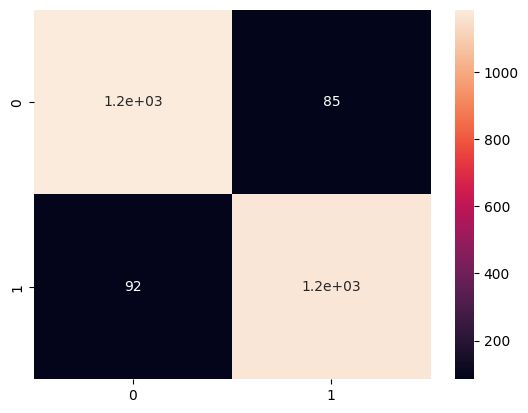

In [16]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True)

In [22]:
#Calculate the model's accuracy
accuracy=accuracy_score(y_test, y_pred)
accuracy*100
Report=classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534

